In [50]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

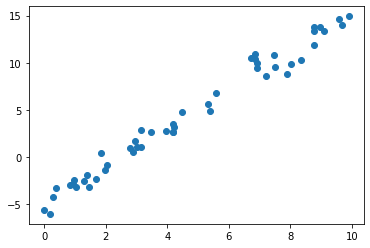

In [6]:
# Creation of random numbers
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

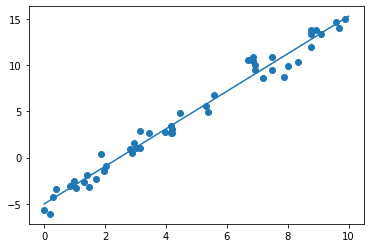

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [5]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.027208810360696
Model intercept: -4.9985770855532055


In [39]:
dataset = pd.read_csv('House_Prices.csv')
dataset.head(2)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000


In [37]:
# Features 
X = dataset.drop(['SalePrice','Order','PID'],  axis=1)

# Target
Y = dataset[['SalePrice']]

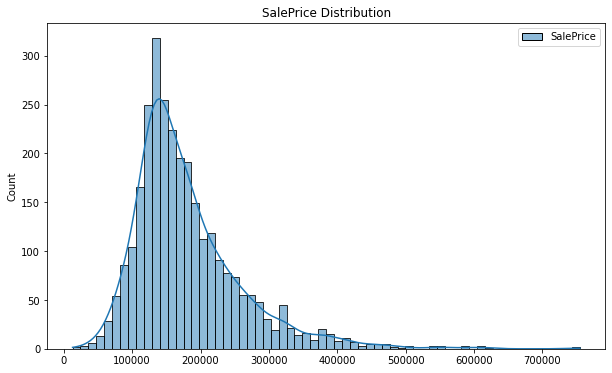

In [45]:
# Visualizing the distribution of the target variable (SalePrice)
plt.figure(figsize=(10, 6))
sns.histplot(Y, kde=True)
plt.title('SalePrice Distribution')
plt.show()

In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2930 non-null   int64  
 1   MS Zoning        2930 non-null   object 
 2   Lot Frontage     2440 non-null   float64
 3   Lot Area         2930 non-null   int64  
 4   Street           2930 non-null   object 
 5   Alley            198 non-null    object 
 6   Lot Shape        2930 non-null   object 
 7   Land Contour     2930 non-null   object 
 8   Utilities        2930 non-null   object 
 9   Lot Config       2930 non-null   object 
 10  Land Slope       2930 non-null   object 
 11  Neighborhood     2930 non-null   object 
 12  Condition 1      2930 non-null   object 
 13  Condition 2      2930 non-null   object 
 14  Bldg Type        2930 non-null   object 
 15  House Style      2930 non-null   object 
 16  Overall Qual     2930 non-null   int64  
 17  Overall Cond  

In [103]:
# Print percentage of missing values
missing_values = X.isnull().mean()
print(missing_values[missing_values > 0])

Lot Frontage      0.167235
Alley             0.932423
Mas Vnr Type      0.007850
Mas Vnr Area      0.007850
Bsmt Qual         0.027304
Bsmt Cond         0.027304
Bsmt Exposure     0.028328
BsmtFin Type 1    0.027304
BsmtFin SF 1      0.000341
BsmtFin Type 2    0.027645
BsmtFin SF 2      0.000341
Bsmt Unf SF       0.000341
Total Bsmt SF     0.000341
Electrical        0.000341
Bsmt Full Bath    0.000683
Bsmt Half Bath    0.000683
Fireplace Qu      0.485324
Garage Type       0.053584
Garage Finish     0.054266
Garage Cars       0.000341
Garage Area       0.000341
Garage Qual       0.054266
Garage Cond       0.054266
Pool QC           0.995563
Fence             0.804778
Misc Feature      0.963823
dtype: float64


# Fixing Years

In [99]:
X[['Garage Yr Blt','Year Built']].corr()

,Garage Yr Blt,Year Built
Garage Yr Blt,1.000000,0.834849
Year Built,0.834849,1.000000


In [101]:
# Remove Garage Yr Blt
X = X.drop(['Garage Yr Blt'], axis=1)
X['Year Built'] = 2024 - X['Year Built']

In [105]:
X.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [109]:
print(pd.pivot_table(X, 
               index = 'BsmtFin Type 1', 
               columns = 'BsmtFin Type 2', 
               values = 'Lot Area', 
               aggfunc = {'Lot Area':len}))

X[['BsmtFin Type 1','BsmtFin Type 2']] = X[['BsmtFin Type 1','BsmtFin Type 2']].fillna('Nan')

BsmtFin Type 2   ALQ   BLQ   GLQ   LwQ   Nan   Rec    Unf
BsmtFin Type 1                                           
ALQ              NaN  30.0   3.0  27.0   NaN  36.0  333.0
BLQ              4.0   1.0  10.0  23.0   NaN  34.0  197.0
GLQ             16.0   7.0   NaN  19.0   1.0  20.0  796.0
LwQ             14.0  11.0  14.0   NaN   NaN  16.0   99.0
Nan              NaN   NaN   NaN   NaN  80.0   NaN    NaN
Rec             19.0  19.0   7.0  20.0   NaN   NaN  223.0
Unf              NaN   NaN   NaN   NaN   NaN   NaN  851.0


In [84]:
for i in missing_values[missing_values > 0].axes[0]:
    print(i)
# Fixing Years



# Handling missing values of numerical features.
num_features = ['Lot Frontage','Mas Vnr Area',
                'BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath',
                'Garage Cars','Garage Area'
                ]



Lot Frontage
Alley
Mas Vnr Type
Mas Vnr Area
Bsmt Qual
Bsmt Cond
Bsmt Exposure
BsmtFin Type 1
BsmtFin SF 1
BsmtFin Type 2
BsmtFin SF 2
Bsmt Unf SF
Total Bsmt SF
Electrical
Bsmt Full Bath
Bsmt Half Bath
Fireplace Qu
Garage Type
Garage Yr Blt
Garage Finish
Garage Cars
Garage Area
Garage Qual
Garage Cond
Pool QC
Fence
Misc Feature


In [96]:
X['Garage Cond'].value_counts()

TA    2665
Fa      74
Gd      15
Po      14
Ex       3
Name: Garage Cond, dtype: int64

In [51]:
# Filling missing values 

X['Alley'] = X['Alley'].fillna('No_Alley')
X['Fireplace Qu'] = X['Fireplace Qu'].fillna('Na')
X['Pool QC'] = X['Pool QC'].fillna('Na')
X['Fence'] = X['Fence'].fillna('Na')
X['Misc Feature'] = X['Misc Feature'].fillna('Na')
X['Mas Vnr Type'] = X['Mas Vnr Type'].fillna('None')
X['Bsmt Qual'] = X['Bsmt Qual'].fillna('Na')
X['Bsmt Cond'] = X['Bsmt Cond'].fillna('Na')
X['Bsmt Exposure'] = X['Bsmt Exposure'].fillna('No')
X['BsmtFin Type 1'] = X['BsmtFin Type 1'].fillna('Na')
X['BsmtFin Type 2'] = X['BsmtFin Type 2'].fillna('Na')

Grvl    120
Pave     78
Name: Alley, dtype: int64


In [63]:
# Potential Categorical features
# list our columns 
columns = X.columns
for col in columns:
    if len(X[col].value_counts())/len(X) < 0.1:
        print(col, X[col].nunique())


MS SubClass 16
MS Zoning 7
Lot Frontage 128
Street 2
Alley 2
Lot Shape 4
Land Contour 4
Utilities 3
Lot Config 5
Land Slope 3
Neighborhood 28
Condition 1 9
Condition 2 8
Bldg Type 5
House Style 8
Overall Qual 10
Overall Cond 9
Year Built 118
Year Remod/Add 61
Roof Style 6
Roof Matl 8
Exterior 1st 16
Exterior 2nd 17
Mas Vnr Type 5
Exter Qual 4
Exter Cond 5
Foundation 6
Bsmt Qual 5
Bsmt Cond 5
Bsmt Exposure 4
BsmtFin Type 1 6
BsmtFin Type 2 6
BsmtFin SF 2 274
Heating 6
Heating QC 5
Central Air 2
Electrical 5
Low Qual Fin SF 36
Bsmt Full Bath 4
Bsmt Half Bath 3
Full Bath 5
Half Bath 3
Bedroom AbvGr 8
Kitchen AbvGr 4
Kitchen Qual 5
TotRms AbvGrd 14
Functional 8
Fireplaces 5
Fireplace Qu 5
Garage Type 6
Garage Yr Blt 103
Garage Finish 3
Garage Cars 6
Garage Qual 5
Garage Cond 5
Paved Drive 3
Open Porch SF 252
Enclosed Porch 183
3Ssn Porch 31
Screen Porch 121
Pool Area 14
Pool QC 4
Fence 4
Misc Feature 5
Misc Val 38
Mo Sold 12
Yr Sold 5
Sale Type 10
Sale Condition 6


/var/folders/n3/pxxd36b52x11p_lp7pqzq5vw0000gn/T/ipykernel_69951/3255886697.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = X.corr()


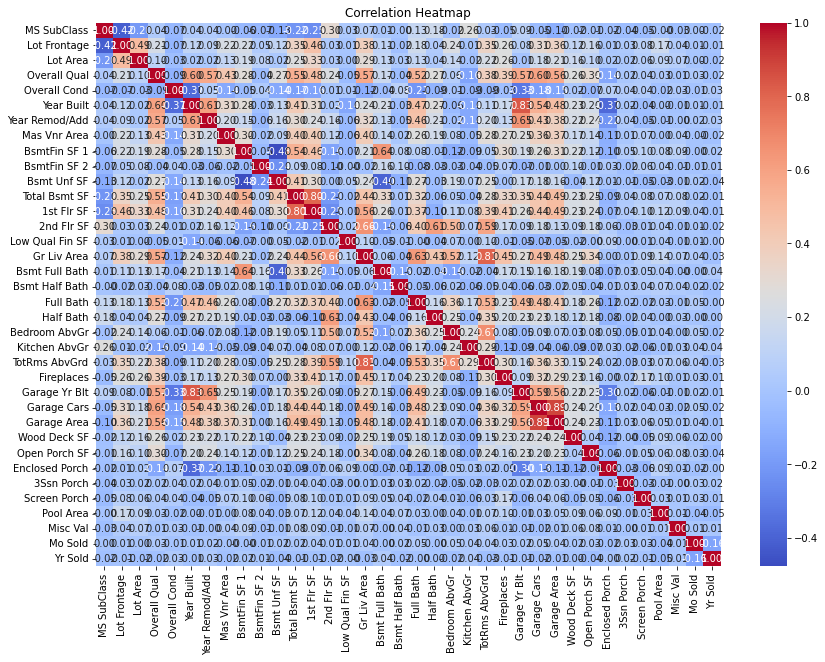

In [46]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [40]:
categorical_cols = X.select_dtypes(include=['object']).columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

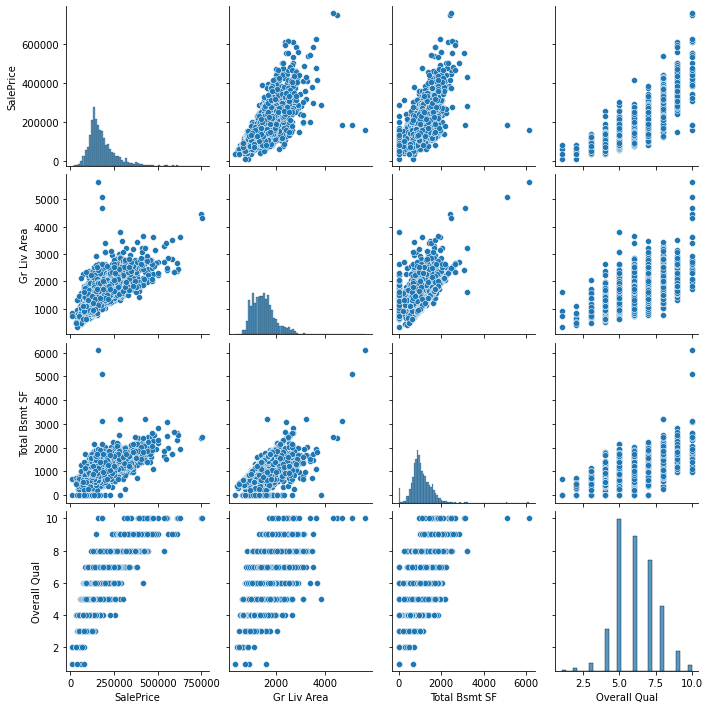

In [47]:
# Pairplot of a few important features against SalePrice
sns.pairplot(dataset[['SalePrice', 'Gr Liv Area', 'Total Bsmt SF', 'Overall Qual']])
plt.show()

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

# Model Evaluation
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2 = r2_score(y_test, y_pred_test)

print(f'Training RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
print(f'R^2 Score: {r2}')

# Visualizing predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Sale Prices')
plt.show()